# Breast Cancer Wisconsin dataset

In [ ]:
import sklearn
sklearn.__version__

'0.23.2'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [ ]:
# Your package imports here

from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

## The Data

In this project, we will be working with the **Breast Cancer Wisconsin dataset**, which
contains 569 examples of malignant and benign tumor cells.  
The Breast Cancer Wisconsin dataset can be found in the UCI
Machine Learning Repository, and more detailed information about this dataset can
be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).  
The first two columns in the dataset store the unique ID numbers of the examples and the corresponding
diagnoses (M = malignant, B = benign), respectively.   
Columns 3-32 contain 30 real-valued features that have been computed from digitized images of the cell
nuclei, which can be used to build a model to predict whether a tumor is benign
or malignant.  

## Load dataset

In [ ]:
# Load the dataset from UCI
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
fx = pd.read_csv('C:/Users/Umaima/DSC540/WisconsinBreastCancer.csv')
X = fx.drop('target', axis=1)
y = fx.target

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Question 1 [5 points]
How many people have cancer?

> Hint: Should be less than 300!

In [ ]:
# Code here

pple_cancer = df[df[1] == "M"]

In [ ]:
pple_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       212 non-null    int64  
 1   1       212 non-null    object 
 2   2       212 non-null    float64
 3   3       212 non-null    float64
 4   4       212 non-null    float64
 5   5       212 non-null    float64
 6   6       212 non-null    float64
 7   7       212 non-null    float64
 8   8       212 non-null    float64
 9   9       212 non-null    float64
 10  10      212 non-null    float64
 11  11      212 non-null    float64
 12  12      212 non-null    float64
 13  13      212 non-null    float64
 14  14      212 non-null    float64
 15  15      212 non-null    float64
 16  16      212 non-null    float64
 17  17      212 non-null    float64
 18  18      212 non-null    float64
 19  19      212 non-null    float64
 20  20      212 non-null    float64
 21  21      212 non-null    float64
 22  22

As the data frame doesnt have column labels we will use index values to get 'M' which is the total number of people that hve cancer 

212 number of people have cancer.

### Investigating the Dataset
Check the data and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [ ]:
print(fx.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

We can examine that there is no value that is categorial

In [ ]:
fx.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There is no null values/ missing values in any of the columns. There are a total of 569 observations in the dataset. X feature set has 30 columns as we removed the target variable.

### Statistical summary of numeric features
- Check the statistical summary of numeric features. Do the variables have values close to each other, or is there large differences?
- What is the variable that has the largest value?
- What is the variable that has the smallest value?

In [ ]:
fx.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.37
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,0.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


Some values are close to eachother. The largest value is of columns worse area, the smallest value is of compactness error and fractal dimension error.

### Correlated Variables
These features are all engineered from images. I suspect there is some variables with large correlation. Are there largely correlated variables? Why do you think they are largely correlated? Comment on a few.
- Calculate correlation.
- Create a correlation heatmap.
- Comment on largely correlated variables.

I created correlation plots in two different manners in order to exmaine te results more closely. One correlation heatmap as a  whole while others segmenting out Mean, Error and worst

### Segmenting out Mean, Error and Worst 

In [ ]:
cols = [0,1,2,3,4,5,6,7,8,9] #extracting mean cols
mean_df = fx[fx.columns[cols]]


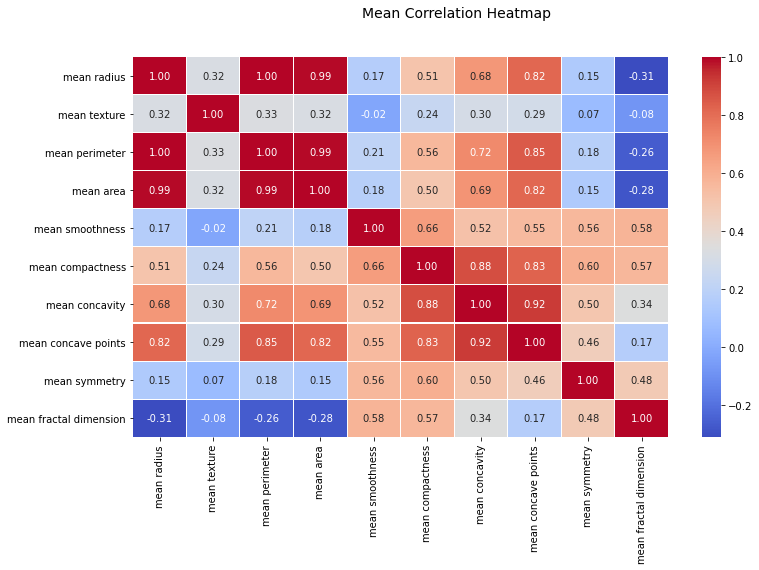

In [ ]:
f, ax = plt.subplots(figsize=(12, 7))
corr = mean_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
t= f.suptitle('Mean Correlation Heatmap', fontsize=14)

We can see a mean raduis and mean parameter. a correlation of 1.00, and a correlation of 0.99 between mean raduis and mean area. From this we can say that as the value of mean raduis increascres, mean parameter also increases. However there is some negative correlation between mean texture and mean smoothness predicting that as the value of mean texture increases mean smoothness decreses. 

In [ ]:
cols = [10,11,12,13,14,15,16,17,18,19] #extracting error cols
error_df = fx[fx.columns[cols]]


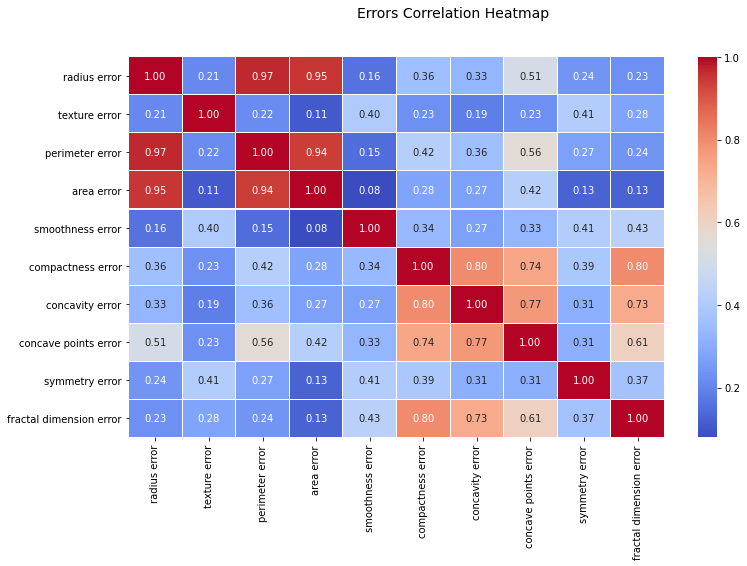

In [ ]:
f, ax = plt.subplots(figsize=(12, 7))
corr =error_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
t= f.suptitle('Errors Correlation Heatmap', fontsize=14)

We can examine from the error correlation plots that mostly the errors are in blue shade, showing least correlation. At the same time, we examine error area and radius high correlation as the area is dependant on radius. Still, we also examine a strong positive correlation between compactness to fractal dimension and concavity.


In [ ]:
cols = [10,21,22,23,24,25,26,27,28,29] #extracting worse cols
worse_df = fx[fx.columns[cols]]


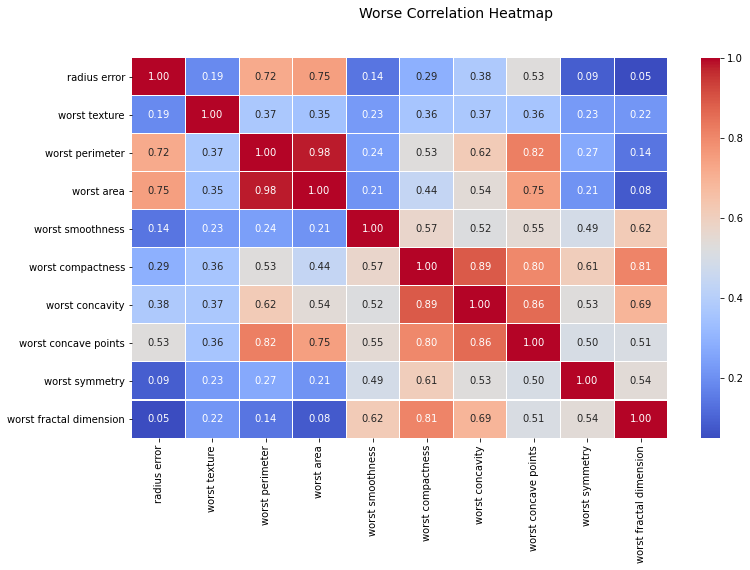

In [ ]:
f, ax = plt.subplots(figsize=(12, 7))
corr = worse_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
t= f.suptitle('Worse Correlation Heatmap', fontsize=14)

We examine strong positive correlations between concavity and compactness. We see strong negative correlations between area and fractal dimensions; for negative correlations, as the value increases, the other decreases. 

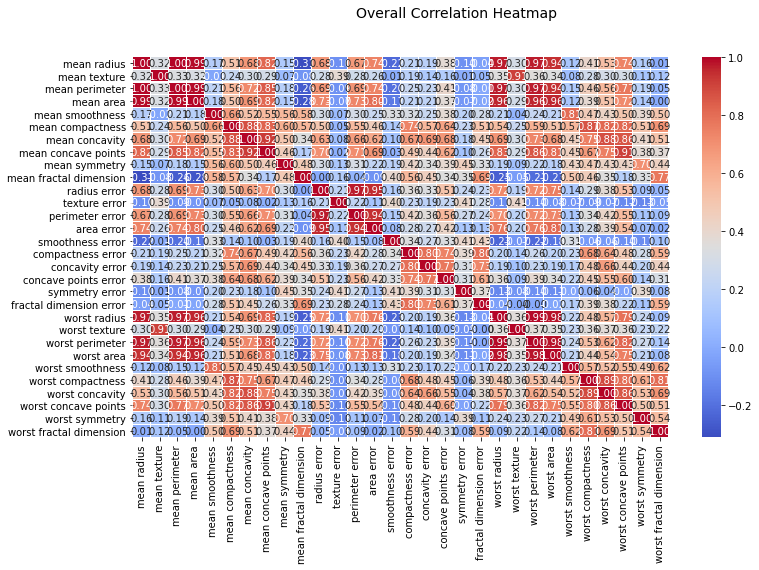

In [ ]:
f, ax = plt.subplots(figsize=(12, 7))
corr = X.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
t= f.suptitle('Overall Correlation Heatmap', fontsize=14)

The red bars show that there is a high correlation between the values, we can examine a correlation of mean values and the worst values. For example there is a higher correlation between mean raduis and worst raduis. 

We segment out mean, error and worst values in other to exmaine in depend the correlation between these categories of features. Mostly the higher strong positive correlations are between raduis,paramters and area beacuse these all are shape parameters and each shape has these parameters. 

### Train - Test split
**Train - Test split** 
- Use sklearn's `tran_test_split()` function to create the split.
- Use `random_state = 55` to create consistent and repeatable train-test splits.

- What is the proportion of cancer classes in train and test sets after splitting? Are they equal or very close to each other?
- What is the importance of stratified sampling?

In [ ]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [ ]:
# Code here

In [ ]:
pd.DataFrame(X_test).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 276 to 112
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              143 non-null    float64
 1   mean texture             143 non-null    float64
 2   mean perimeter           143 non-null    float64
 3   mean area                143 non-null    float64
 4   mean smoothness          143 non-null    float64
 5   mean compactness         143 non-null    float64
 6   mean concavity           143 non-null    float64
 7   mean concave points      143 non-null    float64
 8   mean symmetry            143 non-null    float64
 9   mean fractal dimension   143 non-null    float64
 10  radius error             143 non-null    float64
 11  texture error            143 non-null    float64
 12  perimeter error          143 non-null    float64
 13  area error               143 non-null    float64
 14  smoothness error        

In [ ]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 193 to 239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error        

In [ ]:
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 193 to 239
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  426 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


The testing and the training set is not equal, it has a test split of 0.25, meaning 25% of the data is used for testing while 75% is used for training. The testing set is of 143 entries while the training set is of 423 entries. 

With simple random sampling, there isn't any guarantee that any particular subgroup or dataset is chosen. For this reason stratified sampling is done, it provides better precision as its made sure that the sample contains all the subgroups are represented in it. 

### Using logistic regression classifier

- Initiate the logistic regression classifier from the sklearn library as shown below.
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or use the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - False Positive Rate
     - F1 Score

In [ ]:
clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1)

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [ ]:
pred = clf.predict(X_train)
print('The training accuracy is '+str((metrics.accuracy_score(y_true = y_train, y_pred = pred)*100)))

The training accuracy is 94.13145539906104


In [ ]:
# Code here

In [ ]:
pred = clf.predict(X_test)
print('The testing accuracy is '+str((metrics.accuracy_score(y_true = y_test, y_pred = pred)*100)))


The testing accuracy is 98.6013986013986


In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred))

,0,1
0,89,1
1,1,52


We can see that the error is less as the FP values are 1 and TP and TN are 89 and 52

In [ ]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



We can see that the accuracy is  99% from this we can say that 99% values were predicted correctly while trainng and testing. The precsion and accuracy both are high so this means are model is accurate. 

In [ ]:
confusion_matrix(y_test, pred)

array([[89,  1],
       [ 1, 52]], dtype=int64)

### Using k-nearest neighbours classifier

- Initiate the k-nearest neighbours classifier from the sklearn library with n_neighbors=1. Keep the remaining parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)

In [ ]:
neighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
193,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,0.4053,1.8090,2.642,34.44,0.009098,0.03845,0.03763,0.013210,0.01878,0.005672,15.65,39.34,101.70,768.9,0.1785,0.4706,0.44250,0.14590,0.3215,0.12050
543,13.21,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,0.05781,0.2351,1.5970,1.539,17.85,0.004973,0.01372,0.01498,0.009117,0.01724,0.001343,14.37,37.17,92.48,629.6,0.1072,0.1381,0.10620,0.07958,0.2473,0.06443
255,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,0.4250,0.8098,2.563,35.74,0.006351,0.02679,0.03119,0.013420,0.02062,0.002695,16.39,22.07,108.10,826.0,0.1512,0.3262,0.32090,0.13740,0.3068,0.07957
142,11.43,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,0.1645,0.06562,0.2843,1.9080,1.937,21.38,0.006664,0.01735,0.01158,0.009520,0.02282,0.003526,12.78,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,0.3371,0.7476,2.629,33.27,0.005839,0.03245,0.03715,0.014590,0.01467,0.003121,18.76,21.98,124.30,1070.0,0.1435,0.4478,0.49560,0.19810,0.3019,0.09124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,0.05534,0.5990,1.3910,4.129,67.34,0.006123,0.02470,0.02626,0.016040,0.02091,0.003493,20.05,26.30,130.70,1260.0,0.1168,0.2119,0.23180,0.14740,0.2810,0.07228
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.01759,0.009206,0.01220,0.003130,16.57,20.86,110.30,812.4,0.1411,0.3542,0.27790,0.13830,0.2589,0.10300
366,20.20,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.12650,0.1875,0.06020,0.9761,1.8920,7.128,103.60,0.008439,0.04674,0.05904,0.025360,0.03710,0.004286,24.19,33.81,160.00,1671.0,0.1278,0.3416,0.37030,0.21520,0.3271,0.07632
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,0.3719,2.6120,2.517,23.22,0.016040,0.01386,0.01865,0.011330,0.03476,0.003560,11.48,29.46,73.68,402.8,0.1515,0.1026,0.11810,0.06736,0.2883,0.07748


In [ ]:
pred = neighbors.predict(X_train)
print('The training accuracy is '+str((metrics.accuracy_score(y_true = y_train, y_pred = pred)*100)))

The training accuracy is 100.0


In [ ]:
pred = neighbors.predict(X_test)
print('The testing accuracy is '+str((metrics.accuracy_score(y_true = y_test, y_pred = pred)*100)))


The testing accuracy is 94.4055944055944


In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred)) #confusion matrix

,0,1
0,86,4
1,4,49


We can see that the error is less as the FP values are 4 and True Positive  and True Negative are 89 and 52

In [ ]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### Using Gaussian Naive Bayes classifier

- Initiate the Gaussian Naive Bayes classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either calculate using the confusion matrix, or using the methods in `metrics` to get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - F1 Score

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [ ]:
#Predictions

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [ ]:
#accuracy =
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print("The accuracy is "+str(acc*100)+"%")

The accuracy is 95.8041958041958%


In [ ]:
pred = model.predict(X_train)
print('The training accuracy is '+str((metrics.accuracy_score(y_true = y_train, y_pred = pred)*100)))

The training accuracy is 93.66197183098592


In [ ]:
pred = model.predict(X_test)
print('The testing accuracy is '+str((metrics.accuracy_score(y_true = y_test, y_pred = pred)*100)))


The testing accuracy is 95.8041958041958


In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred)) #confusion matrix

,0,1
0,89,1
1,5,48


We can see that the error is less as the FP values are 54 and True Positive  and True Negative are 89 and 48

In [ ]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



### Logistic Refression with the inverse of the regularization parameter λ

In logistic regression keeping the other parameters constant try these values for C: `C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]`.  
C is the inverse of the regularization parameter $\lambda$. As C increases, the penalty decreases.
- Create a loop and fit the models using each C value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Plot the validation curve based on each C value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
def PerformLogisticRegression(C_list,X_train,y_train):
    '''returns accuracy train and test values while taking the List of C values, the X train data and the y train data '''
    accuracy_train = []
    accuracy_test = []
    predTrain=[]
    predTest=[]
    for C in C_list:
        clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
        clf.fit(X_train, y_train)
        #print(clf.predict(X_test))
        predTrain = clf.predict(X_train)
        predTest = clf.predict(X_test)
        #accuracy scores for training and testing datasets. Create a list of accuracy results for train and test accuracies
        accuracy_train.append((metrics.accuracy_score(y_true = y_train, y_pred = predTrain)*100))
        accuracy_test.append((metrics.accuracy_score(y_true = y_test, y_pred = predTest)*100))
    return accuracy_train,accuracy_test

    

In [ ]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

accuracy_train,accuracy_test = PerformLogisticRegression(C_list,X_train,y_train)

In [ ]:
accuracy_train

[92.48826291079813,
 93.1924882629108,
 94.13145539906104,
 93.42723004694837,
 93.66197183098592,
 94.13145539906104,
 94.13145539906104,
 94.60093896713614,
 94.83568075117371,
 95.07042253521126,
 96.24413145539906,
 96.94835680751174,
 97.88732394366197,
 98.59154929577466,
 98.82629107981221,
 98.59154929577466,
 98.82629107981221,
 99.06103286384976,
 98.82629107981221]

In [ ]:
accuracy_test

[93.7062937062937,
 95.8041958041958,
 97.9020979020979,
 97.2027972027972,
 97.2027972027972,
 97.9020979020979,
 98.6013986013986,
 99.3006993006993,
 99.3006993006993,
 98.6013986013986,
 99.3006993006993,
 99.3006993006993,
 99.3006993006993,
 98.6013986013986,
 98.6013986013986,
 98.6013986013986,
 97.2027972027972,
 97.9020979020979,
 97.2027972027972]

### validation curve based on each C value 

In [ ]:
import matplotlib.pyplot as plt



In [ ]:
def plotValidationCurve(accuracy_train,accuracy_test,listt,title):
    '''plots validation curve'''
    f, ax = plt.subplots(dpi=150)
    plt.plot(accuracy_train, marker='o', color='blue', label = 'train')
    plt.plot(accuracy_test, color='orange', marker='o', label = 'val')
    plt.title(title)
    plt.xticks(ticks=np.arange(len(listt)), labels=listt, rotation=45)
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    

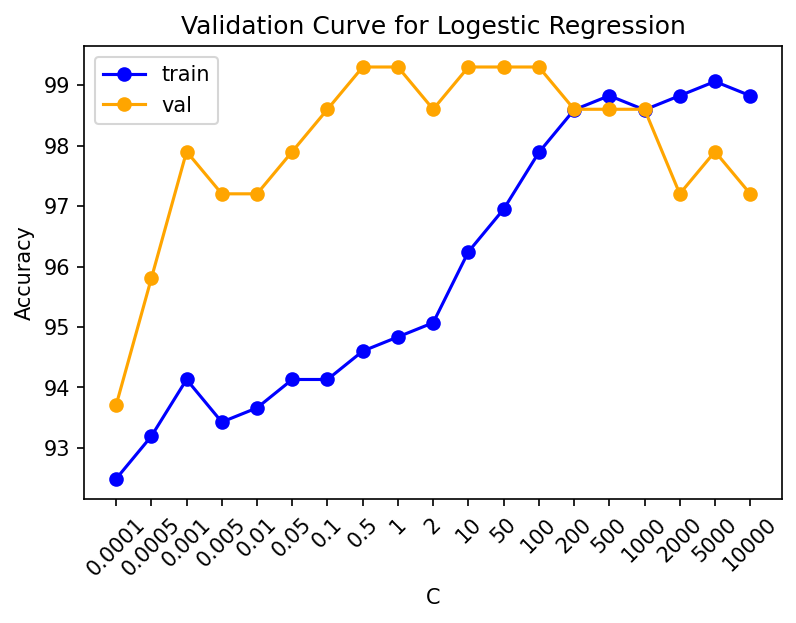

In [ ]:
plotValidationCurve(accuracy_train,accuracy_test,C_list,"Validation Curve for Logestic Regression")

### K Nearest Neighbors keeping the other parameters constant

In K Nearest Neighbors keeping the other parameters constant try these values for K (n_neighbors): `K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]`.  
- Create a loop and fit the models using each K value. 
- Make predictions
- Calculate accuracy scores for **training** and **testing** datasets. Create a list of accuracy results for train and test accuracies. Show these lists.
- Create the validation curve based on each K value and the corresponding the train and test accuracies. 
> Create this curve yourself. Do not use sklearn built-in function.

In [ ]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
predTest=[]
predTrain=[]
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    predTrain = clf.predict(X_train)
    predTest = clf.predict(X_test)
    #accuracy scores for training and testing datasets. Create a list of accuracy results for train and test accuracies
    accuracy_train.append((metrics.accuracy_score(y_true = y_train, y_pred = predTrain)*100))
    accuracy_test.append((metrics.accuracy_score(y_true = y_test, y_pred = predTest)*100))
    




In [ ]:
accuracy_train

[100.0,
 94.83568075117371,
 94.60093896713614,
 93.89671361502347,
 93.1924882629108,
 92.48826291079813,
 92.72300469483568,
 92.48826291079813,
 92.25352112676056,
 92.25352112676056,
 92.25352112676056,
 91.31455399061032,
 90.84507042253522,
 90.14084507042254]

In [ ]:
accuracy_test

[94.4055944055944,
 96.5034965034965,
 93.7062937062937,
 94.4055944055944,
 93.7062937062937,
 94.4055944055944,
 94.4055944055944,
 93.7062937062937,
 93.7062937062937,
 93.7062937062937,
 93.00699300699301,
 92.3076923076923,
 93.00699300699301,
 90.9090909090909]

### Validation curve based on each K value

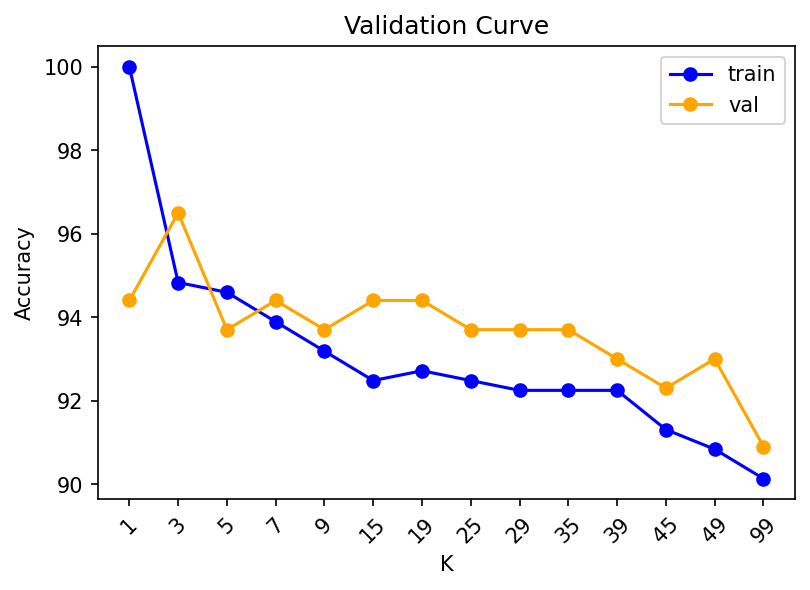

In [ ]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label = 'train')
plt.plot(accuracy_test, color='orange', marker='o', label = 'val')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- The validation curve for logistic regression seems a bit weird. That might have to do with the fact that the data is not normalized.Applying standardization to the data and re-do pervious part will be examined from ploting 


In [ ]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

accuracy_train = []
accuracy_test = []
predTrain=[]
predTest=[]
for C in C_list:
    clf = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=C)
    clf.fit(X_train_ss, y_train)
    #print(clf.predict(X_test))
    predTrain = clf.predict(X_train_ss)
    predTest = clf.predict(X_test_ss)
    #accuracy scores for training and testing datasets. Create a list of accuracy results for train and test accuracies
    accuracy_train.append((metrics.accuracy_score(y_true = y_train, y_pred = predTrain)*100))
    accuracy_test.append((metrics.accuracy_score(y_true = y_test, y_pred = predTest)*100))

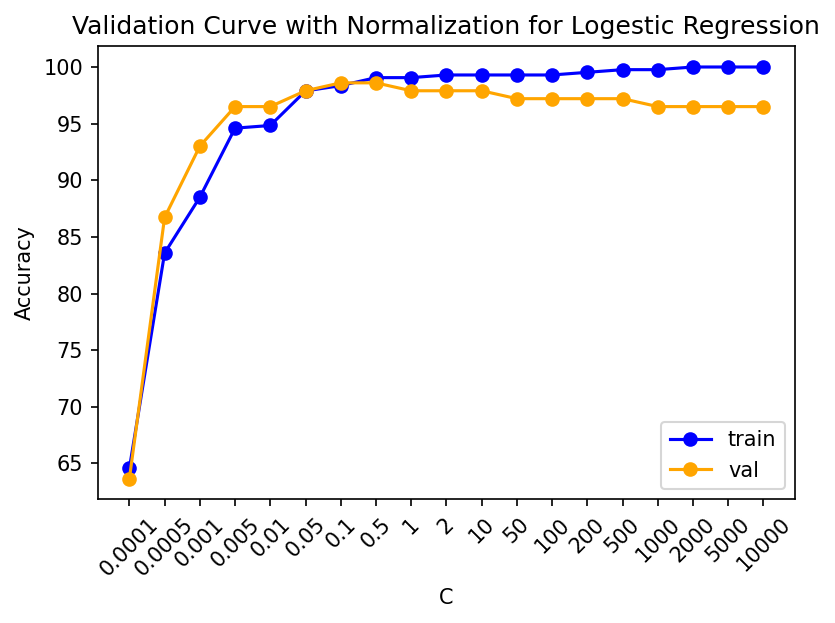

In [ ]:
plotValidationCurve(accuracy_train,accuracy_test,C_list,"Validation Curve with Normalization for Logestic Regression")

Ideally, we would want both the validation curve and the training curve to look as similar as possible.And we can see from the figure above that they are similar to each other. We will choose the value of the parameter where the training and validation curves are closest to each other. For that we will choose C as 0.05.

In [ ]:
X_train_ss.shape

(426, 30)

In [ ]:
X_train_ss[0:426,:].shape[0]

426

In [ ]:
X_train_ss.shape

(426, 30)

In [ ]:
X_train_ss.shape[0]

426

In [ ]:
y_train

193    1
543    0
255    1
142    0
330    1
      ..
167    1
73     1
366    1
245    0
239    1
Name: target, Length: 426, dtype: int64

In [ ]:
accuracy_train = []
accuracy_val = []
clf = LogisticRegression(max_iter = 1000, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
num_points = list(range(1, X_train_ss.shape[0], 1))

for n in num_points:
    clf.fit(X_train_ss, y_train)
    pred_trn = clf.predict(X_train_ss[0:n, :])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_val = clf.predict(X_test_ss)
    accuracy_val.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_val))

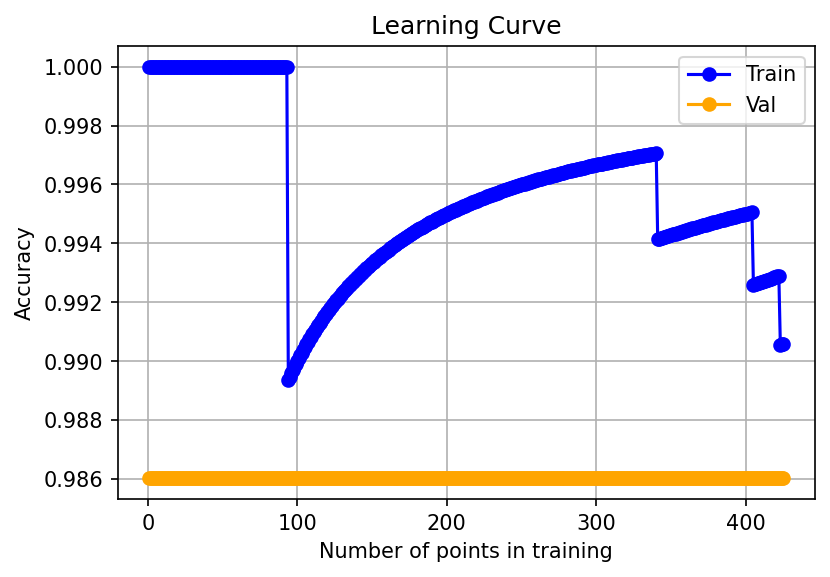

In [ ]:
f, ax = plt.subplots(dpi=150)
ax.plot(num_points, accuracy_train, marker='o', color='blue', label='Train')
ax.plot(num_points, accuracy_val, marker='o', color='orange', label='Val')
ax.set_xlabel('Number of points in training')
ax.set_ylabel('Accuracy')
ax.set_title("Learning Curve")
# ax.set_xticks(np.arange(len(num_points)))
# ax.set_xticklabels(num_points, rotation=90)
ax.legend();
ax.grid()

In [ ]:
# Code here

In [ ]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [ ]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
predTest=[]
predTrain=[]
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_ss, y_train)
    predTrain = clf.predict(X_train_ss)
    predTest = clf.predict(X_test_ss)
    #accuracy scores for training and testing datasets. Create a list of accuracy results for train and test accuracies
    accuracy_train.append((metrics.accuracy_score(y_true = y_train, y_pred = predTrain)*100))
    accuracy_test.append((metrics.accuracy_score(y_true = y_test, y_pred = predTest)*100))

In [ ]:
accuracy_train

[100.0,
 98.35680751173709,
 97.88732394366197,
 97.1830985915493,
 97.1830985915493,
 95.77464788732394,
 96.0093896713615,
 95.30516431924883,
 94.83568075117371,
 95.30516431924883,
 95.30516431924883,
 94.60093896713614,
 94.83568075117371,
 92.48826291079813]

In [ ]:
accuracy_test

[95.1048951048951,
 96.5034965034965,
 97.2027972027972,
 97.2027972027972,
 97.9020979020979,
 97.2027972027972,
 97.2027972027972,
 96.5034965034965,
 96.5034965034965,
 97.2027972027972,
 97.2027972027972,
 97.2027972027972,
 96.5034965034965,
 95.1048951048951]

In [ ]:
# Code here

### Validation curve based on each K value

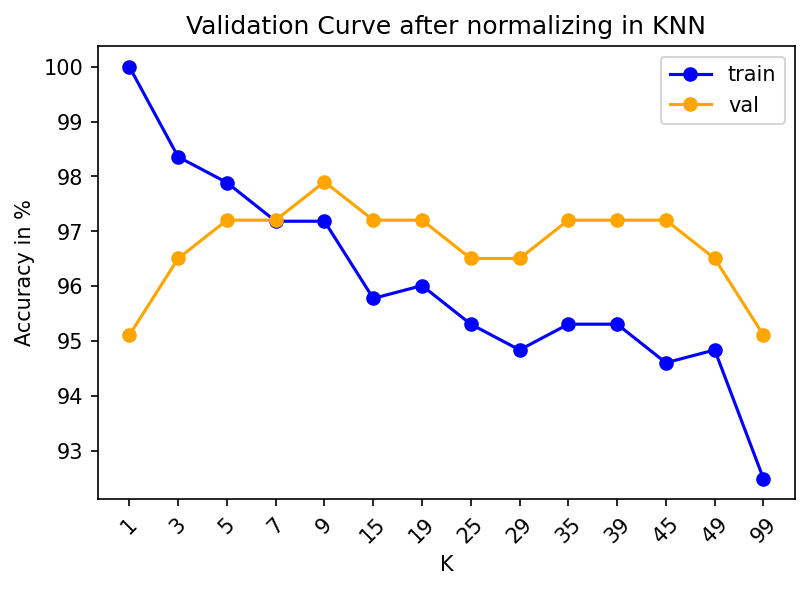

In [ ]:
f, ax = plt.subplots(dpi=150)
plt.plot(accuracy_train, marker='o', color='blue', label = 'train')
plt.plot(accuracy_test, color='orange', marker='o', label = 'val')
plt.title('Validation Curve after normalizing in KNN')
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45)
plt.xlabel('K')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

In a successful ideal case we would want both of the curves training and testing to look as similar as possible; we examine that besides the starting of the curve, both curves are decreases when the value of K increases, hence we can say that the ideal K is 7

### Improving Naive Bayes models

1) Remove Correlated Features - the highly correlated features are counted twice in the model. Double counting leads to overestimating the importance of those features. So, the performance of the Naive Bayes classifier degrades.

2) Handling Missing Data

In [ ]:
fx

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Method Choosen : Remove Correlated Features

From the Heatmap, we saw that mean radius mean perimeter and mean concavity had positive strong correlations of 0.99. hence we will remove them and examine our accuracy. 

In [ ]:
X = fx.drop(['target','mean radius','mean perimeter','mean concavity'], axis=1)
y = fx.target

In [ ]:
X

,mean texture,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,1261.0,0.09780,0.10340,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,858.1,0.08455,0.10230,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,1265.0,0.11780,0.27700,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred


from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print("The accuracy is "+str(acc*100)+" %")

pred = model.predict(X_train)
print('The training accuracy is '+str((metrics.accuracy_score(y_true = y_train, y_pred = pred)*100)))

pred = model.predict(X_test)
print('The testing accuracy is '+str((metrics.accuracy_score(y_true = y_test, y_pred = pred)*100)))


The accuracy is 95.1048951048951 %
The training accuracy is 94.36619718309859
The testing accuracy is 95.1048951048951


From removing the correlated features we can see that the trainig accuracy has been increased by 1%. While the overall accuracy is deacreased by 0.8 percent. This could be beacuse those features that we removed might play a significant role in predicting the model. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7f141f92-beb3-42ac-a223-de5569144e9b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>